In [5]:
import pandas as pd
import plotly
pd.options.plotting.backend = 'plotly'
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

In [6]:
customer_db = pd.read_csv('customer_details.csv')
customer_db.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,internet_service.1,type_of_contract,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,593.30,True,One Line,DSL,1 Year,9,Internet & Phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,542.40,True,Two or More Lines,DSL,Month-to-Month,9,Internet & Phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,280.85,True,One Line,Fiber Optic,Month-to-Month,4,Internet & Phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,1237.85,True,One Line,Fiber Optic,Month-to-Month,13,Internet & Phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,267.40,True,One Line,Fiber Optic,Month-to-Month,3,Internet & Phone


In [7]:
customer_db.isnull().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_and_internet     0
partner_dependents         0
calculated                 0
validate_total_costs       0
num_of_lines               0
internet_service.1         0
type_of_contract           0
rounded_tenure             0
service_type               0
dtype: int64

In [8]:
customer_db = customer_db.dropna()
customer_db.shape
customer_db.isnull().sum()


customer_id               0
gender                    0
is_senior_citizen         0
partner                   0
dependents                0
phone_service             0
internet_service          0
contract_type             0
payment_type              0
monthly_charges           0
total_charges             0
churn                     0
tenure                    0
is_female                 0
has_churned               0
has_phone                 0
has_internet              0
has_phone_and_internet    0
partner_dependents        0
calculated                0
validate_total_costs      0
num_of_lines              0
internet_service.1        0
type_of_contract          0
rounded_tenure            0
service_type              0
dtype: int64

In [9]:
customer_db = customer_db.reset_index()
customer_db.index

RangeIndex(start=0, stop=7038, step=1)

In [10]:
# showing the index for all "boolean" value columns
customer_db.columns.get_indexer(customer_db.select_dtypes('boolean').columns) # not effective for what i need - will try something else

# i also consider dropping non-essential columns 'customer_id' and 'index'
customer_db = customer_db.drop(columns=['customer_id', 'index'])

In [11]:
# making sure the columns 'customer_id' and 'index' were properly removed from dataframe
customer_db.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,internet_service.1,type_of_contract,rounded_tenure,service_type
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,...,True,True,3,593.30,True,One Line,DSL,1 Year,9,Internet & Phone
1,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,...,True,True,0,542.40,True,Two or More Lines,DSL,Month-to-Month,9,Internet & Phone
2,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,...,True,True,0,280.85,True,One Line,Fiber Optic,Month-to-Month,4,Internet & Phone
3,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,...,True,True,1,1237.85,True,One Line,Fiber Optic,Month-to-Month,13,Internet & Phone
4,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,...,True,True,1,267.40,True,One Line,Fiber Optic,Month-to-Month,3,Internet & Phone


In [12]:
# a quick look at the pairplot for non-boolean values
# sns.pairplot(customer_db.select_dtypes(exclude="boolean")) too many variables...will try a subset or variables more closely aligned with my assumptions / hypothesis
customer_db = customer_db.drop(columns='internet_service.1')

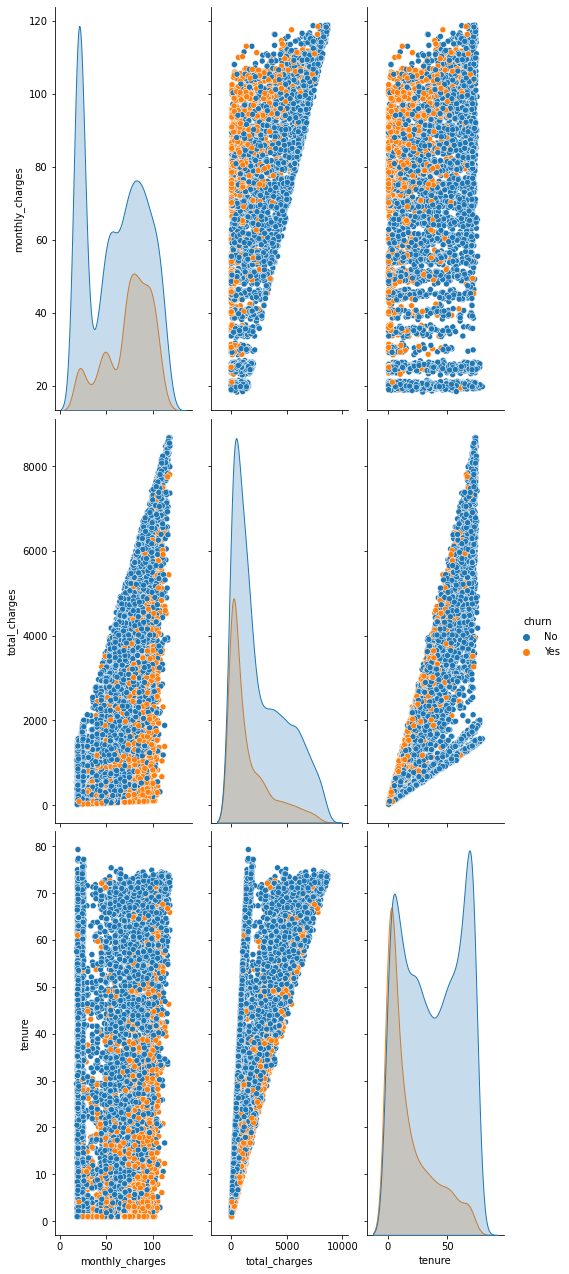

In [13]:
sns.pairplot(customer_db[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue='churn', height=6, aspect=0.4)

Percentage of senior citizens that are female and male gender

In [14]:
customer_db.loc[customer_db['is_senior_citizen'] == 1, 'is_senior_citizen'] = 'Senior Customers'
customer_db.loc[customer_db['is_senior_citizen'] == 0, 'is_senior_citizen'] = 'Non-senior Customers'
ax = pd.crosstab(index=customer_db.is_senior_citizen, columns=customer_db.churn, normalize='index').round(2).plot.bar(height=600, width=800, text_auto=True, labels={'value':'Percent of Total Customers', 'is_senior_citizen': ''}, title='Generational Differences')


ax.update_layout(legend_traceorder='reversed', legend={'title': 'Ended Service', 'orientation': "h", 'xanchor': 'center', 'x': 0.5}, xaxis={'categoryorder': 'array', 'categoryarray': [1]})

In [293]:
pd.crosstab(customer_db.type_of_contract, customer_db.churn, normalize='columns').round(2)

churn,No,Yes
type_of_contract,,
1 Year,0.25,0.09
2 Year,0.32,0.03
Month-to-Month,0.43,0.89


In [15]:
# percentage of churn who are and arent senior citizens
pd.crosstab(customer_db.is_senior_citizen, customer_db.churn, normalize='columns')

churn,No,Yes
is_senior_citizen,,
Non-senior Customers,0.87113,0.745455
Senior Customers,0.12887,0.254545


In [16]:
# senior citizens mean of monthly charges by number of dependents

ax = customer_db[customer_db['is_senior_citizen'] == 1]
pd.crosstab(index=ax.partner_dependents, columns=ax.churn, values=ax.monthly_charges, aggfunc='mean').round(2)

churn
partner_dependents


In [17]:
# average tenure of senior citizens by number of dependents 

ax = customer_db[customer_db['is_senior_citizen'] == 1]
pd.crosstab(index=ax.partner_dependents, columns=ax.churn, values=ax.rounded_tenure, aggfunc='mean').round()

churn
partner_dependents


In [18]:
# relative percentage difference of senior citizens who churn and non-senior citizens who churn 
pd.crosstab(customer_db.is_senior_citizen, customer_db.churn, normalize='index')

# ~42% of all senior citizens churn

churn,No,Yes
is_senior_citizen,,
Non-senior Customers,0.763569,0.236431
Senior Customers,0.583187,0.416813


In [19]:
pd.crosstab(customer_db.payment_type, customer_db.churn, margins=True, normalize="columns")

# those who pay by "e-check" appear to make up ~57% of total customers who churn
# let's plot it

churn,No,Yes,All
payment_type,,,
Bank transfer (automatic),0.249033,0.138503,0.219665
Credit card (automatic),0.249807,0.124064,0.216397
Electronic check,0.250387,0.572727,0.336033
Mailed check,0.250774,0.164706,0.227906


In [112]:
# plotting the percentage of churn by payment type
# question: why are e-check payments significant?
# what is an e-check anyways?
df = customer_db
df['payment_type'] = df['payment_type'].str.title()
ax = pd.crosstab(df.payment_type, df.churn, normalize="index").round(2).plot(kind='barh', height=600, width=1000, text_auto=True, title='E-Check...Not So Convenient', labels={'payment_type': 'Payment Method', 'value': 'Percent of Total Customers'})
ax.update_layout(legend_traceorder='reversed', legend={'title': 'Ended Service'}, yaxis={'categoryorder': 'array', 'categoryarray': ['Credit Card (Automatic)', 'Bank Transfer (Automatic)', 'Mailed Check', 'Electronic Check']})

# for p in ax.patches:
#     ax.annotate(str(p.get_width().round(2)), (p.get_x() + p.get_width(), p.get_y()), ha='center', va='center', xytext=(14, 15), textcoords='offset points', horizontalalignment='right')

## Type of Contract

    Question: Does the custumer's contract type impact their decision to churn?

    options:

        - month-to-month

        - 1 year contract

        - 2 year contract

In [113]:
# 1.
customer_db.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type
0,Female,Non-senior Customers,Yes,Yes,1,1,1,Mailed Check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone
1,Male,Non-senior Customers,No,No,2,1,0,Mailed Check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone
2,Male,Non-senior Customers,No,No,1,2,0,Electronic Check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone
3,Male,Senior Customers,Yes,No,1,2,0,Electronic Check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone
4,Female,Senior Customers,Yes,No,1,2,0,Mailed Check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone


In [114]:
# 2.
pd.crosstab(customer_db.type_of_contract, customer_db.churn, margins=True)
pd.crosstab(customer_db.type_of_contract, customer_db.churn, normalize='index')

# i see that customers on 'month-to-month' contracts makeup ~55% of all customers who churn 

churn,No,Yes
type_of_contract,,
1 Year,0.887458,0.112542
2 Year,0.971547,0.028453
Month-to-Month,0.572755,0.427245


In [115]:
# 3.
pd.crosstab(customer_db.type_of_contract, customer_db.churn, normalize='index')
# 1 and 2 year contract customers are ~32% and ~40% less likely to churn than month-to-month customers
# let's plot it

churn,No,Yes
type_of_contract,,
1 Year,0.887458,0.112542
2 Year,0.971547,0.028453
Month-to-Month,0.572755,0.427245


In [116]:
# 4.
ax = pd.crosstab(customer_db.type_of_contract, customer_db.churn, normalize='index').round(2).plot(kind='bar',
title='Can We Save Our M2M Customers?',
labels={"type_of_contract": "Service Agreement", "value": "Percent of Customers"}, 
text_auto=True, height=600, width=800)
ax.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['Month-to-Month', '1 Year', '2 Year']}, legend_traceorder='reversed',  legend={'title': 'Ended Service', 'orientation': "h", 'yanchor': 'top', 'xanchor': 'center', 'y': 1.08, 'x': 0.5})

# below is the code to place crosstab values above bars

## Total Number of Phone Service Lines

    Question: Does a customer's total number of phone impact their decision to churn?

    options include:

        - no phone service

        - one (1) line

        - two or more lines


In [117]:
pd.set_option('display.max_columns', None)
customer_db.head()
customer_db.num_of_lines.unique()

array(['One Line', 'Two or More Lines', 'No Phone Service'], dtype=object)

In [118]:
customer_db.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type
0,Female,Non-senior Customers,Yes,Yes,1,1,1,Mailed Check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone
1,Male,Non-senior Customers,No,No,2,1,0,Mailed Check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone
2,Male,Non-senior Customers,No,No,1,2,0,Electronic Check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone
3,Male,Senior Customers,Yes,No,1,2,0,Electronic Check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone
4,Female,Senior Customers,Yes,No,1,2,0,Mailed Check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone


In [119]:
pd.crosstab(customer_db.num_of_lines, customer_db.churn, margins=True)

churn,No,Yes,All
num_of_lines,,,
No Phone Service,510,171,681
One Line,2541,849,3390
Two or More Lines,2117,850,2967
All,5168,1870,7038


In [120]:
# i now want to see total num_of_lines percentage that makeup the total churn percentage
# additionally, i want to also compare the population percentage makeup of these three (3) phone-line variables

pd.crosstab(customer_db.num_of_lines, customer_db.churn, normalize='columns')
# as expected, customers with one or more lines makeup ~90% of all customers who churn

pd.crosstab(customer_db.num_of_lines, customer_db.churn, normalize='index')
# however, the population percentage appear to have equal breakdowns across all three (3) variables
# this to me says that regardless of the number of phone lines that customers have, they will churn at approx. equal rates
# let's plot it

churn,No,Yes
num_of_lines,,
No Phone Service,0.748899,0.251101
One Line,0.749558,0.250442
Two or More Lines,0.713515,0.286485


In [121]:
ax = pd.crosstab(customer_db.num_of_lines, customer_db.churn, normalize='index').round(2).plot(kind='barh', text_auto=True, title='Phone Line Options', labels={'num_of_lines': "Phone Service", 'value': 'Percent of Total Customers'})


## Matplotlib
# ax.set_xlabel('Population Percentage')
# ax.set_ylabel('Number of Phone Lines')

# for p in ax.patches:
#     ax.annotate(str(p.get_width().round(2)), (p.get_x() + p.get_width(), p.get_y()), ha='center', va='center', xytext=(14, 15), textcoords='offset points', horizontalalignment='right')

## Number of Dependents 

    Question: Do customers' number of dependents impact their decision to churn?

    responses include:

        - '0' or 'no dependents'

        - '1' dependent

        - '2' dependents

        - '3' dependents 

In [122]:
pd.crosstab(customer_db.partner_dependents, customer_db.churn, margins=True)

# looking at these numbers, i will infer that customers with 0 or no dependents are more likely to churn than those with 1 or more dependents
# let's look at the population differences across the four (4) responses

churn,No,Yes,All
partner_dependents,,,
0,2158,1123,3281
1,1233,420,1653
2,282,77,359
3,1495,250,1745
All,5168,1870,7038


In [123]:
pd.crosstab(customer_db.partner_dependents, customer_db.churn, normalize='index')

# churn	 No	    Yes
# partner_dependents
# 0	0.657726	0.342274
# 1	0.745917	0.254083
# 2	0.785515	0.214485
# 3	0.856734	0.143266

# customers with 1, 2, and 3 dependents are ~9%, ~13%, and ~20% respectively less likely to churn than customers who do not have dependents on their contracts 


churn,No,Yes
partner_dependents,,
0,0.657726,0.342274
1,0.745917,0.254083
2,0.785515,0.214485
3,0.856734,0.143266


In [124]:
ax = pd.crosstab(customer_db.partner_dependents, customer_db.churn, normalize='index').round(2).plot(kind='barh', text_auto=True, title="The Link Between Dependents", labels={"value": 'Percent of Total Customers', "partner_dependents": "Number of Dependents"})
ax.update_layout(legend_traceorder='reversed', legend={'title': 'Ended Service'})

# Matplotlib
# ax.set_xlabel('Population Percentage')
# ax.set_ylabel('Number of Dependents')

# for p in ax.patches:
#     ax.annotate(str(p.get_width().round(2)), (p.get_x() + p.get_width(), p.get_y()), ha='center', va='center', xytext=(14, 15), textcoords='offset points', horizontalalignment='right')

In [125]:
# i am curious to know the gender breakdown of those with 0 dependents and whether or not this influnces their decision to churn
pd.crosstab(index=customer_db.gender, columns=customer_db.churn, values=customer_db.partner_dependents, aggfunc='mean', normalize='index')

# it appears that a customer's gender and the total number of dependents does NOT matter in their decision to churn
# they churn at relatively equal rates across gender popular ~37%

churn,No,Yes
gender,,
Female,0.636033,0.363967
Male,0.627823,0.372177


In [126]:
pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.monthly_charges, aggfunc='mean').round(2)

# decision to churn based on ranges for monthly average charges and customers' contract type are as follows:

# churn	No	Yes
# type_of_contract		
# 1 Year	$62.56	$85.05
# 2 Year	$60.06	$86.78
# Month-to-Month	$61.46	$72.99

churn,No,Yes
type_of_contract,,
1 Year,62.56,85.05
2 Year,60.06,86.78
Month-to-Month,61.46,72.99


In [127]:
# ax = pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.monthly_charges, aggfunc='mean').plot(kind='box', figsize=(8, 8))
pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.monthly_charges, aggfunc='mean')
# ax.set_ylabel('Average Monthly price')

ax = customer_db.pivot_table(index='type_of_contract', columns='churn', values='monthly_charges', aggfunc='mean')
ax.T.plot(kind='box')

# ax.set_xlabel("Service Type", fontsize=(12))
# ax.set_ylabel('Average of Monthly Charges', fontsize=(12))

## Gender Breakdown

    Question: Is one gender more prevelant than another across churned customers?

    Gender Identification Responses:

        - Female

        - Male

### Overall, gender does not appear to be a significant factor across churned customers. Both Female and Male genders are relatively equal in population percentage who churn (~27%)

In [128]:
pd.crosstab(index=customer_db.gender, columns=customer_db.churn, normalize='index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


## Tenure Amongst Churned Customer

    Question/thought: What is the summary for all churned customers across their contract type?


In [129]:
customer_db.groupby('type_of_contract').rounded_tenure.describe().round()

,count,mean,std,min,25%,50%,75%,max
type_of_contract,,,,,,,,
1 Year,1475.0,42.0,19.0,1.0,27.0,44.0,58.0,74.0
2 Year,1687.0,57.0,18.0,1.0,49.0,64.0,71.0,79.0
Month-to-Month,3876.0,18.0,18.0,1.0,3.0,12.0,28.0,72.0


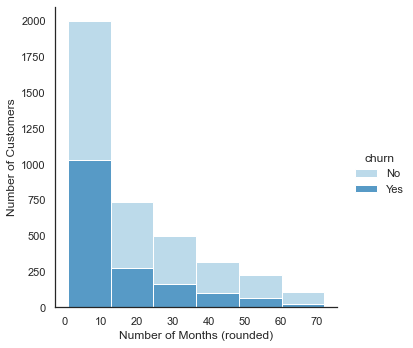

In [130]:
# focusing on month-to-month customers to gauge whether or not there are outliers in this dataset
sns.set_theme(style="white", palette='Paired')
monthly_customers = customer_db[customer_db['type_of_contract'] == 'Month-to-Month']

ax1 = sns.displot(data=monthly_customers, x='rounded_tenure', bins=6, hue='churn', multiple='stack')
ax1.set(xlabel='Number of Months (rounded)', ylabel="Number of Customers")

# 12 month bins...will create another similar chart to visually see the breakdown of six (6) month period for only churned customers

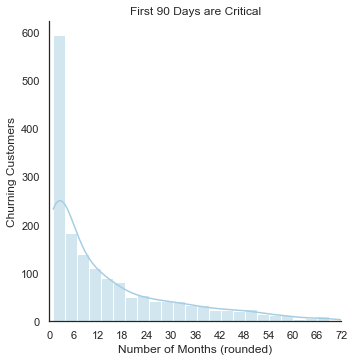

In [131]:
churned_monthly_customers = monthly_customers[monthly_customers['churn'] == "Yes"]

ax1 = sns.displot(data=churned_monthly_customers, x='rounded_tenure', bins=24, kde=True)
ax1.set(xlabel='Number of Months (rounded)', ylabel="Churning Customers", title="First 90 Days are Critical")
# ax1.sns.set_theme(style='dark', palette='RdBu', font='Helvetica')

ax1.set(xlim=(1,72), xticks=range(0, 78, 6)) # setting the xaxis values to count by 6 month periods thru the max tenure for month-to-month customers

In [132]:
churned_monthly_customers = monthly_customers[monthly_customers['churn'] == "Yes"]
churned_monthly_customers[(churned_monthly_customers['rounded_tenure'] > 3 )& (churned_monthly_customers['rounded_tenure'] <= 6)].count()

gender                    184
is_senior_citizen         184
partner                   184
dependents                184
phone_service             184
internet_service          184
contract_type             184
payment_type              184
monthly_charges           184
total_charges             184
churn                     184
tenure                    184
is_female                 184
has_churned               184
has_phone                 184
has_internet              184
has_phone_and_internet    184
partner_dependents        184
calculated                184
validate_total_costs      184
num_of_lines              184
type_of_contract          184
rounded_tenure            184
service_type              184
dtype: int64

In [133]:
churned_monthly_customers = monthly_customers[monthly_customers['churn'] == "Yes"]

px.histogram(churned_monthly_customers, x='rounded_tenure', nbins=24, text_auto=True)

## Creating 2 Dataframes for Easier Comparison 

### Active Customers vs. Churned Costumers

#### Focusing on "Active Customers"

In [134]:
only_active = customer_db[customer_db['churn'] == 'No']

In [135]:
# measurement of all monthly charges (active & churned customers)
only_active.groupby('type_of_contract').monthly_charges.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
type_of_contract,,,,,,,,
1 Year,1309.0,62.56,31.67,18.25,24.85,64.85,91.25,118.60
2 Year,1639.0,60.06,34.59,18.40,23.70,63.40,89.90,118.75
Month-to-Month,2220.0,61.46,27.86,18.75,38.54,64.95,84.91,116.50


In [136]:
only_active.groupby('type_of_contract').monthly_charges.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
type_of_contract,,,,,,,,
1 Year,1309.0,62.56,31.67,18.25,24.85,64.85,91.25,118.60
2 Year,1639.0,60.06,34.59,18.40,23.70,63.40,89.90,118.75
Month-to-Month,2220.0,61.46,27.86,18.75,38.54,64.95,84.91,116.50


In [137]:
only_active.groupby('type_of_contract').rounded_tenure.mean().round()

type_of_contract
1 Year            42.0
2 Year            57.0
Month-to-Month    21.0
Name: rounded_tenure, dtype: float64

In [138]:
only_active.groupby('type_of_contract').rounded_tenure.median()

type_of_contract
1 Year            43.0
2 Year            64.0
Month-to-Month    16.0
Name: rounded_tenure, dtype: float64

In [139]:
# what is the median value for ea. contract type?
# result: calculated in months

# churn	    No	    Yes
# type_of_contract		
# 1 Year	43.0	48.5
# 2 Year	64.0	65.0
# Month-to-Month	16.0	7.0

pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.rounded_tenure, aggfunc='median').round(2)

churn,No,Yes
type_of_contract,,
1 Year,43.0,48.5
2 Year,64.0,65.0
Month-to-Month,16.0,7.0


In [140]:
pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.monthly_charges, aggfunc='median').round(2)

churn,No,Yes
type_of_contract,,
1 Year,64.85,95.05
2 Year,63.40,97.28
Month-to-Month,64.95,79.03


In [141]:
# what is the median value for ea. contract type?
# result: calculated in months

# churn	    No	    Yes
# type_of_contract		
# 1 Year	43.0	48.5
# 2 Year	64.0	65.0
# Month-to-Month	16.0	7.0

pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.rounded_tenure, aggfunc='median').round(2)

churn,No,Yes
type_of_contract,,
1 Year,43.0,48.5
2 Year,64.0,65.0
Month-to-Month,16.0,7.0


In [142]:
pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.rounded_tenure, aggfunc='median', normalize='index').round(2)

churn,No,Yes
type_of_contract,,
1 Year,0.47,0.53
2 Year,0.50,0.50
Month-to-Month,0.70,0.30


In [143]:
pd.crosstab(index=customer_db.type_of_contract, columns=customer_db.churn, values=customer_db.rounded_tenure, aggfunc='mean', normalize='index').round(2)

churn,No,Yes
type_of_contract,,
1 Year,0.48,0.52
2 Year,0.48,0.52
Month-to-Month,0.60,0.40


In [144]:
only_active.groupby('type_of_contract').rounded_tenure.describe()

,count,mean,std,min,25%,50%,75%,max
type_of_contract,,,,,,,,
1 Year,1309.0,41.680672,19.118625,1.0,26.0,43.0,58.0,74.0
2 Year,1639.0,56.990848,17.922484,1.0,49.0,64.0,71.0,79.0
Month-to-Month,2220.0,21.011712,18.400184,1.0,5.0,16.0,33.0,72.0


## Focusing on "Churned Customers"

In [145]:
churned_customers = customer_db[customer_db['churn'] == 'Yes']
churned_customers.groupby('type_of_contract').rounded_tenure.describe().round()

,count,mean,std,min,25%,50%,75%,max
type_of_contract,,,,,,,,
1 Year,166.0,45.0,18.0,1.0,33.0,48.0,59.0,74.0
2 Year,48.0,61.0,11.0,28.0,55.0,65.0,70.0,74.0
Month-to-Month,1656.0,14.0,16.0,1.0,2.0,7.0,21.0,72.0


In [146]:
churned_customers.groupby('type_of_contract')['monthly_charges'].agg(['sum', 'mean'])

,sum,mean
type_of_contract,,
1 Year,14118.45,85.050904
2 Year,4165.30,86.777083
Month-to-Month,120877.60,72.993720


In [147]:
df = customer_db
df = df.rename(columns={'type_of_contract': 'service_agreement'})
df.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,service_agreement,rounded_tenure,service_type
0,Female,Non-senior Customers,Yes,Yes,1,1,1,Mailed Check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone
1,Male,Non-senior Customers,No,No,2,1,0,Mailed Check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone
2,Male,Non-senior Customers,No,No,1,2,0,Electronic Check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone
3,Male,Senior Customers,Yes,No,1,2,0,Electronic Check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone
4,Female,Senior Customers,Yes,No,1,2,0,Mailed Check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone


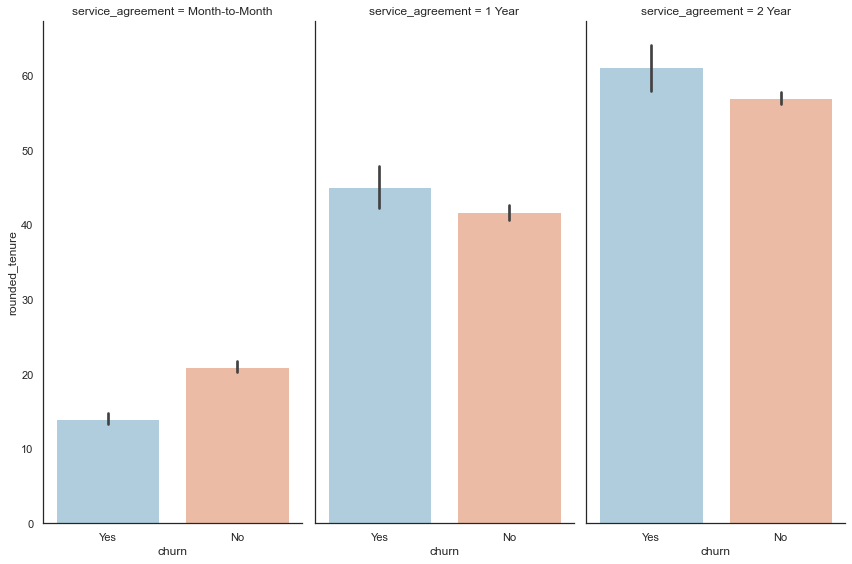

In [148]:
# my_order = customer_db.groupby(by=['type_of_contract'.median().iloc[::-1].index

g = sns.FacetGrid(df, col='service_agreement', col_order=['Month-to-Month', '1 Year', '2 Year'], height=8, aspect=.5)

sns.set(style='white', font='Helvitica')
g.map(sns.barplot, "churn", "rounded_tenure", order=["Yes", "No"], palette='RdBu_r')

## What about Partnered Customers?

    Question: Does having a partner play a role in a customer's decision to churn?

    Options/reponsonses:

        - Yes

        - No



In [149]:
customer_db.partner.unique()

array(['Yes', 'No'], dtype=object)

In [150]:
# measuring the percentage of churned employees who responded having a partner
pd.crosstab(index=customer_db.partner, columns=customer_db.churn, normalize='columns').round(3)

# churned customers without a partner makeup ~64% of all churned customers...let's find out how they compare to their 'partnered' counterparts

churn,No,Yes
partner,,
No,0.472,0.642
Yes,0.528,0.358


In [151]:
pd.crosstab(index=customer_db.partner, columns=customer_db.churn, normalize='index').round(3)

# it appears that partnered customers are ~13% less likely to churn then churned customers without dependents

churn,No,Yes
partner,,
No,0.670,0.330
Yes,0.803,0.197


findfont: Font family ['Helvitica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvitica'] not found. Falling back to DejaVu Sans.


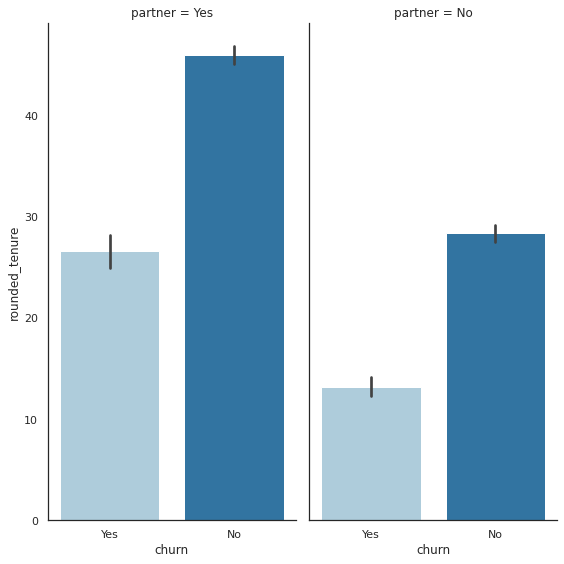

In [152]:
g = sns.FacetGrid(df, col='partner', col_order=['Yes', 'No'], height=8, aspect=.5)

sns.set(style='white', font='Helvitica')
g.map(sns.barplot, "churn", "rounded_tenure", order=["Yes", "No"], palette='Paired')

## Let's Calculate How Much We're Losing 

    Question: Given the total number of lost custmers, how much revenue does this equate to?

In [153]:
churned_customers.monthly_charges.sum()

# 1870 churned customers as of???
# $139,161.35 (lost monthly revenue)
# or $1,669,936.20 (lost yearly revenue)

139161.35

## What About The 'Type' Of Services We Provide?

    Question: Are the suite of services we provide sufficient enough, or is one or more service better than another?

    Options:

        - phone only

        - internet only

        - phone and internet

In [154]:
customer_db.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type
0,Female,Non-senior Customers,Yes,Yes,1,1,1,Mailed Check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone
1,Male,Non-senior Customers,No,No,2,1,0,Mailed Check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone
2,Male,Non-senior Customers,No,No,1,2,0,Electronic Check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone
3,Male,Senior Customers,Yes,No,1,2,0,Electronic Check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone
4,Female,Senior Customers,Yes,No,1,2,0,Mailed Check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone


In [155]:
pd.crosstab(index=customer_db.service_type, columns=customer_db.churn, normalize="index")

churn,No,Yes
service_type,,
Internet & Phone,0.671907,0.328093
Internet Only,0.748899,0.251101
Phone Only,0.925804,0.074196


In [156]:
pd.crosstab(index=customer_db.service_type, columns=customer_db.churn, normalize='columns')
ax = pd.crosstab(index=customer_db.service_type, columns=customer_db.churn, normalize='index').round(2).plot(kind='barh', text_auto=True, labels={'value': 'Percent of Total Customers', 'service_type': 'Type of Service'}, title="Let's Talk Internet")
ax.update_layout(legend_traceorder='reversed', legend={'title': 'Ended Service'}, yaxis={'categoryorder': 'array', 'categoryarray': ['Phone Only', 'Internet Only', 'Internet & Phone']})

# Internet and Phone agreements makeup ~85% of all who churned
# Internet and Phone agreements are ~8%, and ~26% more likely to churn than only Internet, or only Phone services respectively 

In [157]:
pd.set_option('display.max_columns', None)
customer_db.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type
0,Female,Non-senior Customers,Yes,Yes,1,1,1,Mailed Check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone
1,Male,Non-senior Customers,No,No,2,1,0,Mailed Check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone
2,Male,Non-senior Customers,No,No,1,2,0,Electronic Check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone
3,Male,Senior Customers,Yes,No,1,2,0,Electronic Check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone
4,Female,Senior Customers,Yes,No,1,2,0,Mailed Check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone


In [381]:
df = pd.read_csv('TELCO_mqm-copy - Copy of Table1_CustDetails.csv')
df['internet_service_type'] = df['internet_service.1']
df = df.drop(columns='internet_service.1')
df = df.dropna()
df = df.reset_index()
df.shape

(7038, 27)

In [159]:
df.head()

,index,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone,DSL
1,1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone,DSL
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone,Fiber Optic
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone,Fiber Optic
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone,Fiber Optic


In [160]:
df2 = df[df['churn'] == 'Yes']
df2.head()

,index,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type,internet_service_type
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone,Fiber Optic
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone,Fiber Optic
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone,Fiber Optic
18,18,0022-TCJCI,Male,1,No,No,1,1,1,Credit card (automatic),62.7,2791.50,Yes,44.5,False,True,True,True,True,0,2791.50,True,One Line,1 Year,45,Internet & Phone,DSL
19,19,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.1,25.10,Yes,1.0,False,True,False,True,False,0,25.10,True,No Phone Service,Month-to-Month,1,Internet Only,DSL


In [161]:
pd.crosstab(index=df.internet_service_type, columns=df.churn, normalize='index')
pd.crosstab(index=df.internet_service_type, columns=df.churn, margins=True)


## fiber optic customers are ~23% more likely to churn than DSL
## fiber optic customers are ~35% more likely to churn than those customers without internet service

churn,No,Yes,All
internet_service_type,,,
DSL,1957,460,2417
Fiber Optic,1801,1297,3098
No Internet Service,1410,113,1523
All,5168,1870,7038


In [162]:
ax = px.scatter(df2, x='rounded_tenure', y='monthly_charges', color='type_of_contract', title='Fiber Optic is Not Enough', labels={'rounded_tenure': 'Number of Months (rounded)', 'monthly_charges': 'Average Monthly Payment'})
ax.update_layout(legend={'title': 'Service Agreement'})
ax

# size='partner_dependents'

In [163]:
pd.crosstab(index=df.internet_service_type, columns=df.churn, normalize='index' ).round(2)

churn,No,Yes
internet_service_type,,
DSL,0.81,0.19
Fiber Optic,0.58,0.42
No Internet Service,0.93,0.07


In [164]:
ax = px.scatter(df2, x='rounded_tenure', y='monthly_charges', color='internet_service_type', trendline='ols', title="Looking at Our Internet Options", labels={'rounded_tenure': 'Number of Months (rounded)', 'monthly_charges': 'Average Monthly Payment'})
ax.update_layout(legend={'title': '', 'orientation': 'h', 'yanchor': 'top', 'xanchor': 'center', 'y': 1.11, 'x': 0.5})
ax

In [165]:
pd.crosstab(index=df.internet_service_type, columns=df.churn, values=df.monthly_charges, aggfunc='mean').round(2)

churn,No,Yes
internet_service_type,,
DSL,60.20,49.04
Fiber Optic,93.94,88.13
No Internet Service,21.13,20.37


In [166]:
df[df['type_of_contract'] == '2 Year'].monthly_charges.mean()

# $60.72 average monthly charge for all 2 year contract customers

60.82397747480741

In [167]:
print(60.72*24)
# estimate of 2 year contract monthly sum 
# $1457.28

1457.28


In [168]:
df.head()

,index,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,True,False,True,True,True,3,593.30,True,One Line,1 Year,9,Internet & Phone,DSL
1,1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,False,False,True,True,True,0,542.40,True,Two or More Lines,Month-to-Month,9,Internet & Phone,DSL
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone,Fiber Optic
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone,Fiber Optic
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone,Fiber Optic


In [169]:
df[(df['type_of_contract'] == '2 Year') & (df['total_charges'] < 1457.28)].value_counts().count()

# ~522 number of customers who ended their services before the 2 year period

524

In [170]:
# what about 1 Year service customers who ended their contract before the 1 year term period?

df[(df['type_of_contract'] == '1 Year')].monthly_charges.mean()

# on average they paid $65.06 per month
print(65.06172086720866*12)

# which equates to = ~$780.74 annually

780.740650406504


In [171]:
# calculating the estimated total number of 1 Year churned customers who churned before their 1 year term period
# which returns ~299 1 Year customers who churned before their term period

df[(df['type_of_contract'] == '1 Year') & (df['total_charges'] < 780.74)].value_counts().count()

300

In [193]:
# ax = px.scatter(df2, x='rounded_tenure', y='monthly_charges', color='internet_service_type', trendline='ols', title="Looking at Our Internet Options", labels={'rounded_tenure': 'Number of Months (rounded)', 'monthly_charges': 'Average Monthly Payment'})

# looking specifically at fiber optic, month-to-month customers who churned
df = df2[df2['internet_service_type'] == 'Fiber Optic']
px.histogram(df2, x=df2.rounded_tenure, color='internet_service_type')

<AxesSubplot:xlabel='rounded_tenure', ylabel='Count'>

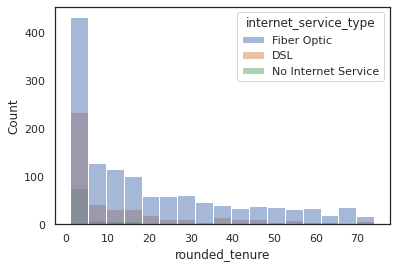

In [182]:
sns.histplot(df2, x=df2.rounded_tenure, hue='internet_service_type')

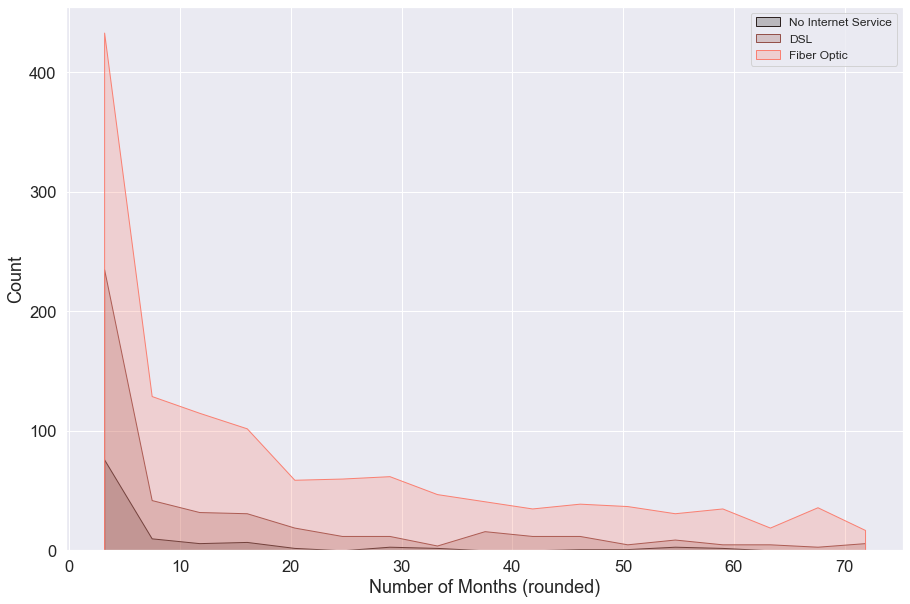

In [290]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.histplot(df2, x=df2.rounded_tenure, hue='internet_service_type', element="poly", palette="dark:salmon_r")

ax.set_xlabel("Number of Months (rounded)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=['No Internet Service', 'DSL', 'Fiber Optic'], fontsize='12')

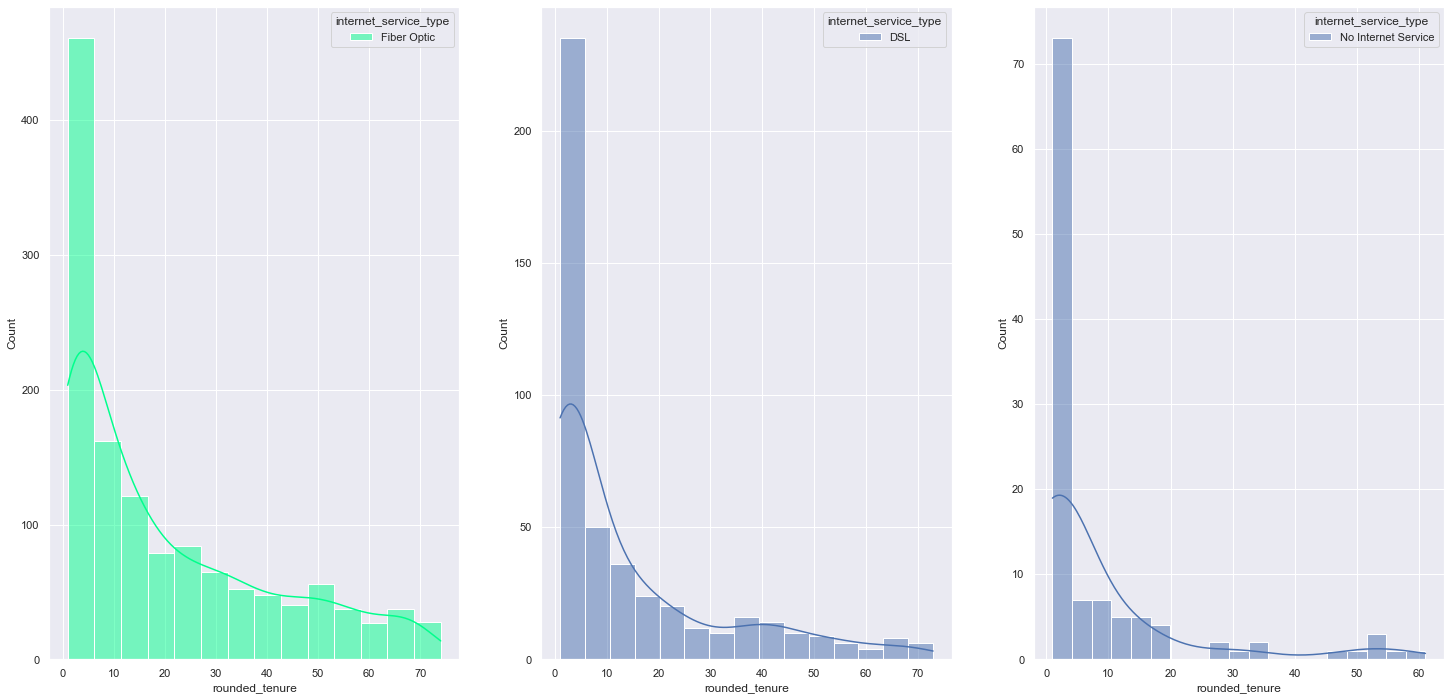

In [205]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(25, 12))

df = df2[df2['internet_service_type'] == 'Fiber Optic']
df3 = df2[df2['internet_service_type'] == 'DSL']
df4 = df2[df2['internet_service_type'] == 'No Internet Service']

sns.histplot(data=df, x="rounded_tenure", kde=True, hue="internet_service_type", palette="gist_rainbow", ax=axs[0])
sns.histplot(data=df3, x="rounded_tenure", kde=True, hue="internet_service_type", color="olive", ax=axs[1])
sns.histplot(data=df4, x="rounded_tenure", kde=True, hue="internet_service_type", color="gold", ax=axs[2])
plt.show()

In [382]:
pd.crosstab(index=df.internet_service_type, columns=df.churn, normalize='index')

churn,No,Yes
internet_service_type,,
DSL,0.809681,0.190319
Fiber Optic,0.581343,0.418657
No Internet Service,0.925804,0.074196


In [311]:
ax = pd.crosstab(index=df2.internet_service_type, columns=df2.type_of_contract, margins=True).plot(kind='bar', text_auto=True, height=600, width=800)

ax.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['No Internet Service', 'DSL', 'Fiber Optic']}, legend_traceorder='reversed',  legend={'title': '', 'orientation': "h", 'yanchor': 'top', 'xanchor': 'center', 'y': 1.10, 'x': 0.5})

In [365]:
ax = df2.plot(kind='hist', x='internet_service_type', color='internet_service_type', text_auto=True, height=600, width=800, labels={'internet_service_type': ' '})

ax.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['No Internet Service', 'DSL', 'Fiber Optic']}, legend_traceorder='reversed', legend={'title': '', 'orientation': "h", 'yanchor': 'top', 'xanchor': 'center', 'y': 1.10, 'x': 0.5})

In [390]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=df2['internet_service_type'], name='internet options'))
fig.add_trace(
    go.Scatter(x=['Fiber Optic', 'DSL', 'No Internet Service'], y=[42, 19, 7], name="percent change"),
    secondary_y=True,
    )
fig.update_layout(title={'example'})

# ax = df2.plot(kind='hist', x='internet_service_type', color='internet_service_type', text_auto=True, height=600, width=800, labels={'internet_service_type': ' '})
# ax.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['No Internet Service', 'DSL', 'Fiber Optic']}, legend_traceorder='reversed', legend={'title': '', 'orientation': "h", 'yanchor': 'top', 'xanchor': 'center', 'y': 1.10, 'x': 0.5})


ValueError: 
    Invalid value of type 'builtins.set' received for the 'title' property of layout
        Received value: {'example'}

    The 'title' property is an instance of Title
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.layout.Title`
      - A dict of string/value properties that will be passed
        to the Title constructor

        Supported dict properties:
            
            font
                Sets the title font. Note that the title's font
                used to be customized by the now deprecated
                `titlefont` attribute.
            pad
                Sets the padding of the title. Each padding
                value only applies when the corresponding
                `xanchor`/`yanchor` value is set accordingly.
                E.g. for left padding to take effect, `xanchor`
                must be set to "left". The same rule applies if
                `xanchor`/`yanchor` is determined
                automatically. Padding is muted if the
                respective anchor value is "middle*/*center".
            text
                Sets the plot's title. Note that before the
                existence of `title.text`, the title's contents
                used to be defined as the `title` attribute
                itself. This behavior has been deprecated.
            x
                Sets the x position with respect to `xref` in
                normalized coordinates from 0 (left) to 1
                (right).
            xanchor
                Sets the title's horizontal alignment with
                respect to its x position. "left" means that
                the title starts at x, "right" means that the
                title ends at x and "center" means that the
                title's center is at x. "auto" divides `xref`
                by three and calculates the `xanchor` value
                automatically based on the value of `x`.
            xref
                Sets the container `x` refers to. "container"
                spans the entire `width` of the plot. "paper"
                refers to the width of the plotting area only.
            y
                Sets the y position with respect to `yref` in
                normalized coordinates from 0 (bottom) to 1
                (top). "auto" places the baseline of the title
                onto the vertical center of the top margin.
            yanchor
                Sets the title's vertical alignment with
                respect to its y position. "top" means that the
                title's cap line is at y, "bottom" means that
                the title's baseline is at y and "middle" means
                that the title's midline is at y. "auto"
                divides `yref` by three and calculates the
                `yanchor` value automatically based on the
                value of `y`.
            yref
                Sets the container `y` refers to. "container"
                spans the entire `height` of the plot. "paper"
                refers to the height of the plotting area only.


In [ ]:
ax = pd.crosstab(customer_db.type_of_contract, customer_db.churn, normalize='index').round(2).plot(kind='bar',
title='Can We Save Our M2M Customers?',
labels={"type_of_contract": "Service Agreement", "value": "Percent of Customers"}, 
text_auto=True, height=600, width=800)
ax.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['Month-to-Month', '1 Year', '2 Year']}, legend_traceorder='reversed',  legend={'title': 'Ended Service', 'orientation': "h", 'yanchor': 'top', 'xanchor': 'center', 'y': 1.08, 'x': 0.5})


In [296]:
df2.head()

,index,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated,validate_total_costs,num_of_lines,type_of_contract,rounded_tenure,service_type,internet_service_type
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,False,True,True,True,True,0,280.85,True,One Line,Month-to-Month,4,Internet & Phone,Fiber Optic
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,False,True,True,True,True,1,1237.85,True,One Line,Month-to-Month,13,Internet & Phone,Fiber Optic
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,True,True,True,True,True,1,267.40,True,One Line,Month-to-Month,3,Internet & Phone,Fiber Optic
18,18,0022-TCJCI,Male,1,No,No,1,1,1,Credit card (automatic),62.7,2791.50,Yes,44.5,False,True,True,True,True,0,2791.50,True,One Line,1 Year,45,Internet & Phone,DSL
19,19,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.1,25.10,Yes,1.0,False,True,False,True,False,0,25.10,True,No Phone Service,Month-to-Month,1,Internet Only,DSL
